In [17]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [24]:
articles = pd.read_csv(r'../data/raw/h-and-m-personalized-fashion-recommendations/articles.csv')

In [25]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [26]:
# Unique product classes
classes = df['product_type_name'].unique()

# Number of product classes
num_classes = len(classes)

print(num_classes, classes)

131 ['Vest top' 'Bra' 'Underwear Tights' 'Socks' 'Leggings/Tights' 'Sweater'
 'Top' 'Trousers' 'Hair clip' 'Umbrella' 'Pyjama jumpsuit/playsuit'
 'Bodysuit' 'Hair string' 'Unknown' 'Hoodie' 'Sleep Bag' 'Hair/alice band'
 'Belt' 'Boots' 'Bikini top' 'Swimwear bottom' 'Underwear bottom'
 'Swimsuit' 'Skirt' 'T-shirt' 'Dress' 'Hat/beanie' 'Kids Underwear top'
 'Shorts' 'Shirt' 'Cap/peaked' 'Pyjama set' 'Sneakers' 'Sunglasses'
 'Cardigan' 'Gloves' 'Earring' 'Bag' 'Blazer' 'Other shoe'
 'Jumpsuit/Playsuit' 'Sandals' 'Jacket' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Hat/brim' 'Tailored Waistcoat' 'Necklace' 'Ballerinas' 'Tie'
 'Pyjama bottom' 'Felt hat' 'Bracelet' 'Blouse' 'Outdoor overall' 'Watch'
 'Underwear body' 'Beanie' 'Giftbox' 'Sleeping sack' 'Dungarees'
 'Outdoor trousers' 'Wallet' 'Swimwear set' 'Swimwear top' 'Flat shoe'
 'Garment Set' 'Ring' 'Waterbottle' 'Wedge' 'Long John'
 'Outdoor Waistcoat' 'Pumps' '

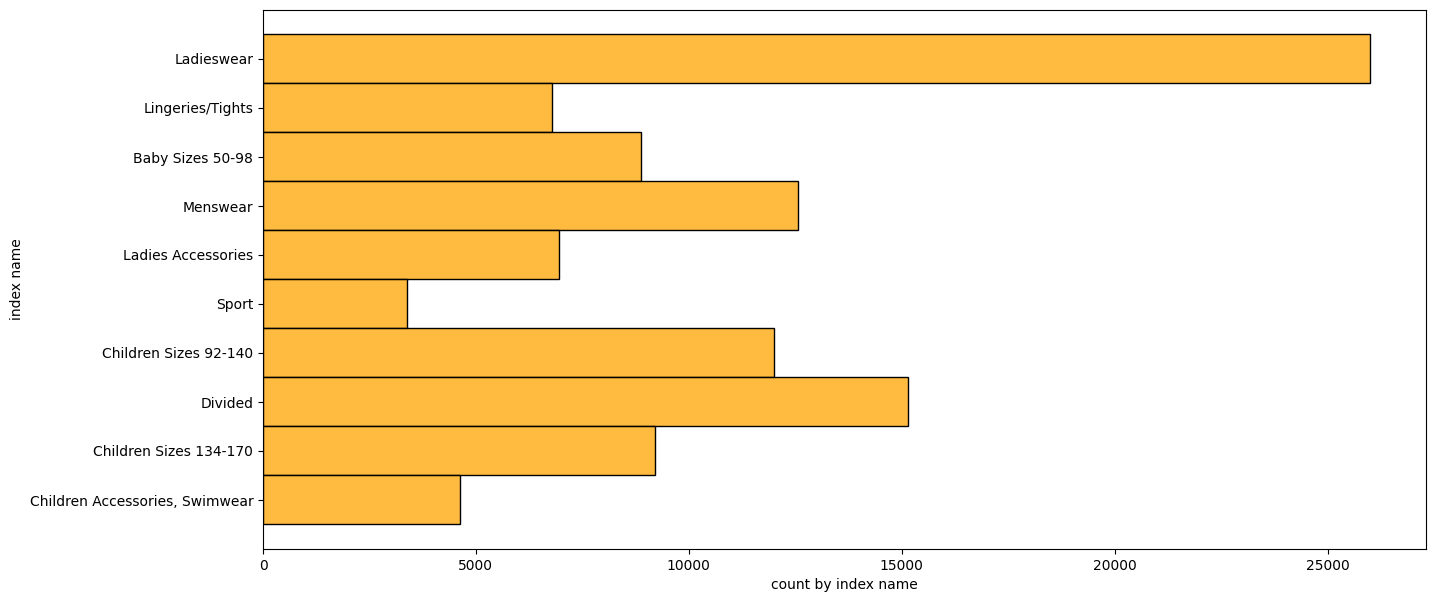

In [27]:
# Plot by index name
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

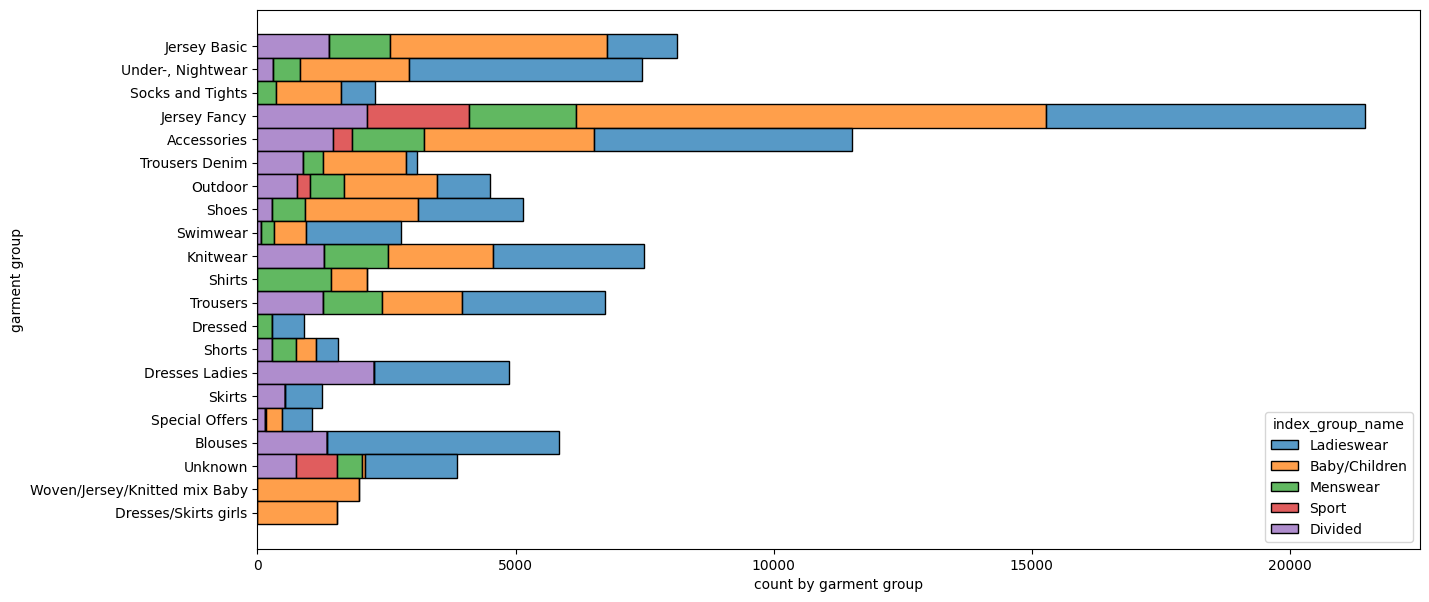

In [28]:
# Plot by garment group name grouped by index group name

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [29]:
# Group product types by product group

pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [30]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404
